# Central limit theorem

The **central limit theorem** says that, as the sample size increase, the distribution of the sample means approaches -se aproxima- a normal distribution with average equals to the population mean, and **standard deviation equals to standard deviation of the original variable divided by the squared root of the size sample**. This fact is assured for $n$ greater than or equal to 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$


Where:

$\sigma_\bar{x}$ = sample std

$\sigma$ = population std

$n$ = sample size


The standard deviation of sample means is known as **standard error of the mean**.


In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions. [[1]](https://en.wikipedia.org/wiki/Central_limit_theorem)

In [1]:
import pandas as pd
from zipfile import ZipFile

In [2]:
path = '/home/gabriela/Data Science/bootcamp-alura/module3/dataset/PeNSE_2015_AMOSTRA2.zip'
zip_ = ZipFile(path)
file = zip_.namelist()[1]

pense_2015 = pd.read_csv(zip_.open(file), 
                         sep=';', thousands='.',
                         decimal=',')

pense_2015.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [4]:
pense_2015['BMI'] = (pense_2015['VB17003'] / 
                    ((pense_2015['VB17004']/100)**2))


pense_2015['BMI']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: BMI, Length: 16556, dtype: float64

pense_2015 is our population

In [41]:
n = 2000
qnty_sample = 1500

samples = pd.DataFrame()

for i in range(qnty_sample):
    _ = pense_2015.BMI.sample(n)
    _.index = range(0, len(_))
    samples['Sample_' + str(i)] = _
    
samples

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_1490,Sample_1491,Sample_1492,Sample_1493,Sample_1494,Sample_1495,Sample_1496,Sample_1497,Sample_1498,Sample_1499
0,21.867590,23.781221,15.262488,17.264672,19.286504,19.419563,16.831133,18.768556,18.022824,30.146003,...,21.089740,19.114187,17.628205,15.643490,20.300729,17.707031,15.447012,17.644343,21.061549,17.046545
1,17.889273,25.194840,23.600000,21.075430,20.067924,18.139181,16.598585,25.308187,20.443594,21.323098,...,18.532713,15.451168,15.973737,17.231802,18.711111,20.164896,21.925709,20.655992,22.451627,31.473861
2,24.883027,22.939359,20.907197,21.477627,18.442907,22.987056,20.146343,23.110345,25.110344,19.008926,...,21.113652,14.884466,22.910429,21.035325,18.916217,19.686581,19.631062,18.493011,21.977107,20.088347
3,31.512053,18.762076,17.416017,30.346566,23.364721,26.699893,17.612192,21.393869,15.847386,21.116643,...,17.437101,23.676354,21.162064,20.754980,13.748192,34.716857,16.683673,18.503689,21.638894,20.870415
4,20.359443,20.222222,17.188757,27.648123,17.074971,16.311328,19.744634,21.346975,19.671576,18.911802,...,22.481721,21.377770,21.665979,20.333014,16.692616,19.939242,19.412389,27.443247,23.195147,22.957447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,25.493640,22.143301,16.754689,17.956936,19.054496,22.766369,23.897788,30.751646,17.037202,35.128466,...,18.885465,18.836478,27.995486,17.119399,17.877978,21.001156,18.875091,23.969605,21.362394,19.244505
1996,21.207822,24.850660,19.046073,23.464233,31.343461,19.492817,17.848255,16.150317,18.329262,18.811051,...,22.283737,19.650562,19.813061,19.104932,17.251996,30.234375,22.704480,18.605480,24.213119,26.564665
1997,18.662015,24.753250,27.783609,20.837256,18.444520,20.593866,17.716518,14.970181,20.853005,34.765568,...,18.121302,22.416181,22.701982,19.635185,21.680327,18.394349,17.146385,18.456790,21.097521,22.083878
1998,20.467616,15.862841,18.313657,21.340539,16.109960,16.408519,17.901197,18.918990,20.007900,20.192878,...,16.473130,20.371030,14.429192,17.321863,21.601562,17.652293,29.086132,18.432815,16.694411,18.318815


O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.


**as the increase of the sample size, the distribution of the sample means approaches a normal distribution**

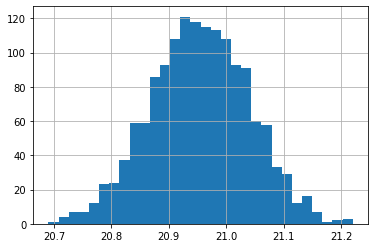

In [42]:
samples.mean().hist(bins=30);

O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

**with average equals to the population mean**

In [43]:
# population mean
pense_2015['BMI'].mean()

20.958252206631837

In [44]:
# average of sample means
samples.mean().mean()

20.95386719989007

O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

**standard deviation equals to standard deviation of the original variable divided by the squared root of the size sample**

In [45]:
n

2000

In [46]:
import numpy as np

std_sample_approx = pense_2015.BMI.std()/np.sqrt(n)

std_sample_approx

0.09490859583922756

In [47]:
samples.mean().std()

0.08571909686586647